This notebook will be used to document my work in doing initial exploratory data analysis for the house prices data set. This will help to potentially inform feature creation/selection and ultimately our process in training and validating our chosen model.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


The data set contains about 1500 observations in the training and (almost) the same amount in the test set. There are 80 included explanatory variables. SalePrice is the dependent variable we are interested in modelling so let's investigate that.

In [9]:
#Importing some other stats to help us
from scipy.stats import skew, pearsonr

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
1.880940746034036


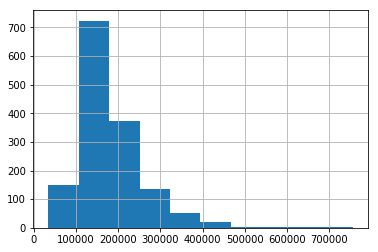

In [11]:
price = train['SalePrice']
print(price.describe())
print(skew(price))
price.hist()

The house prices have a positive skew, this can easily be easily dealt with using a log transformation. In fact, the competition metric uses log prices so that's a pretty handy hint!

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64
0.1212103673013655


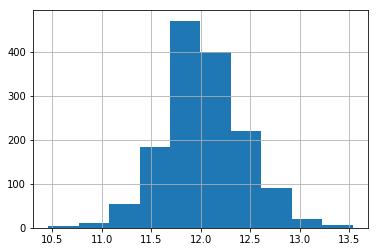

In [13]:
print(np.log(price).describe())
print(skew(np.log(price)))

np.log(price).hist()


Now, let's look at the types of explanatory variables included in the data set. It will most likely be a mixture of numerical and categorical variables.

In [22]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


Note that according to the data description, MSSubClass should actually be a categorical variable, not a numerical one. We'll need to convert it, but let's look at the countplot first.

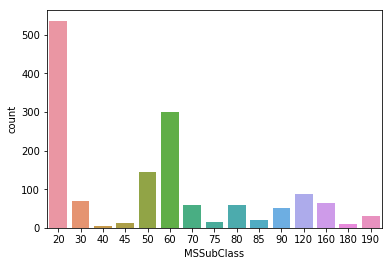

In [27]:
sns.countplot(x='MSSubClass',data=train)

In [28]:
train['MSSubClass'] = train['MSSubClass'].apply(str)

Real life data is bound to have missing values, and this data set is no exception. 

In [32]:
na_count = train.isnull().sum().sort_values(ascending=False)
na_count

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

Remarkably well behaved! There are four main offenders when it comes to missing values, PoolQC, MiscFeature, Alley and Fence. 

For PoolQC, the data description tells us that a value of NA means that the house doesn't have a pool. Most houses don't actually have pools, so it makes sense to see a large number of NAs, however it is important to note that the data itself isn't actually missing but rather that the house doesn't actually have a pool. To deal with this we should replace the NA value with something else, e.g. 'no_pool'. Similar logic applies to MiscFeature

In [34]:
train['PoolQC'] = train['PoolQC'].fillna('no_pool')